

# <center> The Talbot Effect and dispersive PDE</center>

## Solution of a linear dispersive PDE on the circle by  Fourier series

$$
\frac{\partial  u}{\partial t } +   \frac{\partial^2 u}{\partial x^3} = 0, \qquad   x\in S^1, \quad t>0.
$$
Periodic boundary conditions
$$
u(t, -\pi ) = u(t, \pi ), \quad u_x(t, -\pi ) = u_x(t, \pi ), \quad u_{xx}(t, -\pi ) = u_{xx}(t, \pi ),
$$
Initial condition $u(0,x) = f(x)$
 

### Explicit solution
See [P. Olver](http://www-users.math.umn.edu/~olver/pde.html) Section 8.5 Dispersion and solitons

$$
u(t,x) = \frac{a_0}{2}+ \sum_{n = 1}^{\infty} \left(a_n\, \cos{n^3\, t}+ b_n\, \sin{n^3\, t}\right)\cos{ n\, x} +  \left(-a_n\, \sin{n^3\, t}+ b_n\, \cos{n^3\, t}\right)\sin{ n\, x},
$$
where
$$
a_n = \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\, \cos{ n\,   x} \, dx,  \quad 
b_n = \frac{1}{\pi}\int_{-\pi}^{\pi} f(x)\, \sin{ n\,   x} \, dx
$$ 

In [1]:
import numpy as np
import matplotlib as mpl
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from math import ceil
def mod_pi(z):
    return (z + np.pi)  - 2*np.pi*( ceil((z+ np.pi )/(2*np.pi))-1)-np.pi 

In [3]:

M = 3100    # size of the discretization in x and t
x = np.linspace(-np.pi, np.pi, M)
tt = np.linspace(0, 2*np.pi, M)
#########################################
# initial conditions  are chosen so that  
# squared become probability distributions
####################################
# Gaussian like initial condition 
u0 = np.exp(-6*(np.tan(x/2))**2 )
ampl_u0 = np.sqrt(1/integrate.simps(u0*u0, x))
gauss = ampl_u0*u0
#######################################
# block like initial condition
wd  =  np.pi/5 
ampl = np.sqrt(1/wd)
block = np.piecewise(x, [np.abs(x) < wd/2, np.abs(x) > wd/2], 
                           [ampl, 0])
#######################################################
f = block

In [ ]:
def blck(p):
    z = np.array([mod_pi(s-p) for s in x])
    bl = np.piecewise(z, [np.abs(z) < wd/2, np.abs(z) > wd/2], 
                           [ampl, 0])
    return bl

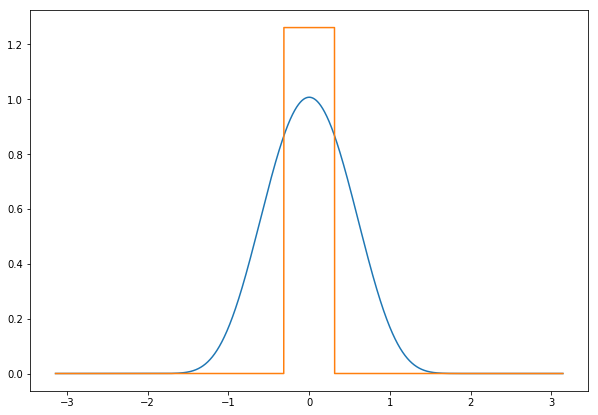

In [4]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(x,gauss)
ax.plot(x,block)

plt.show()

## Numerical seaparation of variables

It is conveninet to rewrite $u(t,x)$ as 
$$
u(t,x) = \frac{a_0}{2}+ \sum_{n = 1}^{\infty} \left(a_n\, \cos{n \, x}+ b_n\, \sin{n\,  x}\right)\cos{ n^3\, t} +  \left(-a_n\, \sin{n \, x}+ b_n\, \cos{n \, x}\right)\sin{ n^3\, t},
$$
So that the spacial terms 
$$
a_n\, \cos{n \, x}+ b_n\, \sin{n\,  x}, \quad -a_n\, \sin{n \, x}+ b_n\, \cos{n \, x}
$$
can be recycled by approximating $u(t,x)$ 

In [5]:
N = 850 # N the numeber of Fourier coefficients
#Fourier coefficient  $a_n$ y $b_n$ are calculated by numerical integration
nn = np.array(range(N))
n = nn.reshape((N,1))
y = np.cos(n*x) 
a = (1/np.pi)*integrate.simps(y*f, x)
a = a.reshape((N,1))
a0 = a[0]
a[0] = a0/2

z = np.sin(n*x) 
b = (1/np.pi)*integrate.simps(z*f, x)
b = b.reshape((N,1))

# Separación de variables espaciales
x_part1, x_part2 = a*y + b*z, -a*z +  b*y

In [6]:
def perfil(t):
    z = np.sum(np.cos(n**3*t)*x_part1 + np.sin(n**3*t)*x_part2, axis = 0)  
    return   z

In [30]:
z = 1/4*blck(np.pi) - 1/2*blck(np.pi/2) + 1/2*f + 1/2*blck(-np.pi/2)+ 1/4*blck(-np.pi)

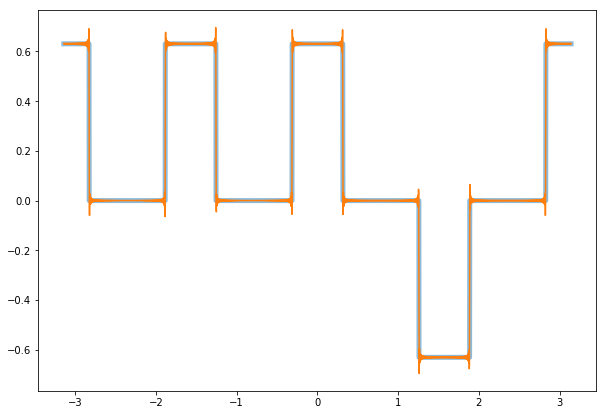

In [31]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(x,z, lw = 5, alpha = 0.5)
ax.plot(x,perfil(np.pi/2))

plt.show()

In [29]:
Talbot = np.array([perfil(t) for t in tt])

In [10]:
Intensity = [pf*pf for pf in Talbot]

In [11]:
MaxList = [np.max(pf) for pf in Intensity]
MinList = [np.min(pf) for pf in Intensity]
MeanList = [integrate.simps(pf*x, x) for pf in Intensity]
SqrList = [integrate.simps(pf, x) for pf in Intensity]

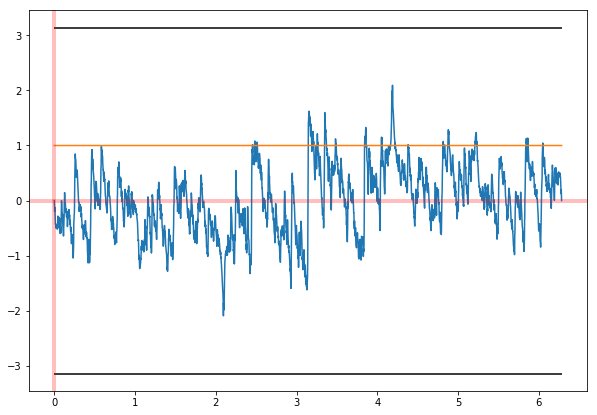

In [12]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(tt,MeanList)
ax.plot(tt,SqrList)
plt.hlines(-np.pi, 0, 2*np.pi)
plt.hlines(np.pi, 0, 2*np.pi)
plt.axhline(linewidth=4, alpha = 0.25, color='r')
plt.axvline(linewidth=4, alpha = 0.25, color='r')
plt.show()

## Carpets of light

In [13]:
maxvalue = np.max(MaxList)
TalbotFake = [-1 + (2/maxvalue)*pf for pf in Intensity]

In [14]:
Inte= Talbot*Talbot

In [15]:
Fake = -1 + (2/maxvalue)*Inte

https://matplotlib.org/examples/color/colormaps_reference.html

[Text(1,0,'< 0.0'), Text(1,0,'0.5'), Text(1,0,'> 1.00')]

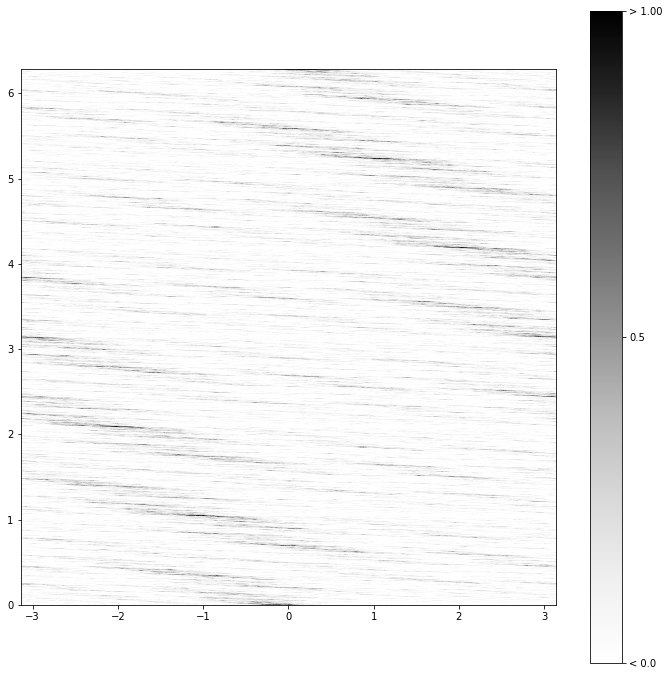

In [16]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
picture = ax.imshow(Fake, interpolation='none', cmap = cm.Greys,
                origin='lower', extent=[-np.pi, np.pi, 0, 2*np.pi],
                vmax=1, vmin=-1)
cbar = fig.colorbar(picture, ticks=[ -0.999, 0.0, 0.999  ])
cbar.ax.set_yticklabels(['< 0.0', '0.5', '> 1.00'])

[Text(1,0,'< -1'), Text(1,0,'0.0'), Text(1,0,'> 1.00')]

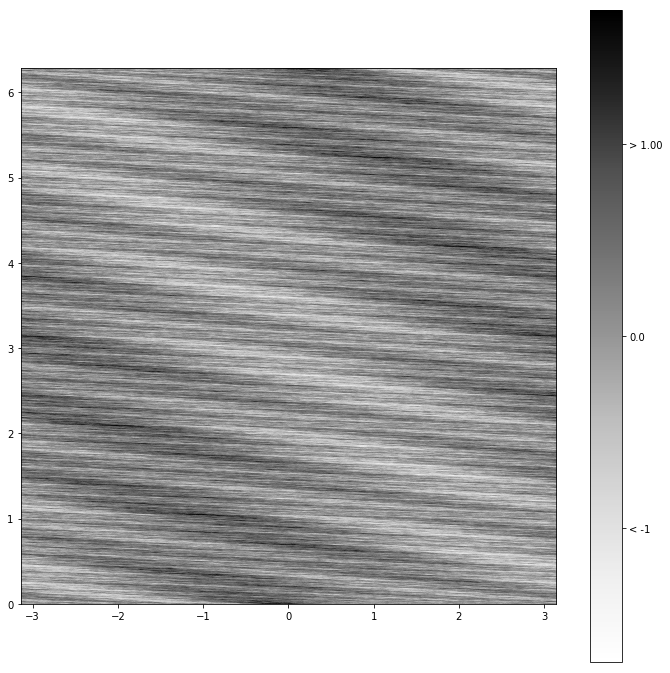

In [17]:

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
picture = ax.imshow(Talbot, interpolation='none', cmap = cm.Greys,
                origin='lower', extent=[-np.pi, np.pi, 0, 2*np.pi],
                vmax=abs(Talbot).max(), vmin=-abs(Talbot).max())
cbar = fig.colorbar(picture, ticks=[ -1, 0.0, 1  ])
cbar.ax.set_yticklabels(['< -1', '0.0', '> 1.00'])

## Zooming

In [18]:
wide = 2*np.shape(Talbot)[0]//30
xvp, yvp = 100,1000
wide
zoom = Talbot[xvp:xvp+wide, yvp:yvp+wide]
#np.shape(zoom)

[Text(1,0,'< -1'), Text(1,0,'0.0'), Text(1,0,'> 1.00')]

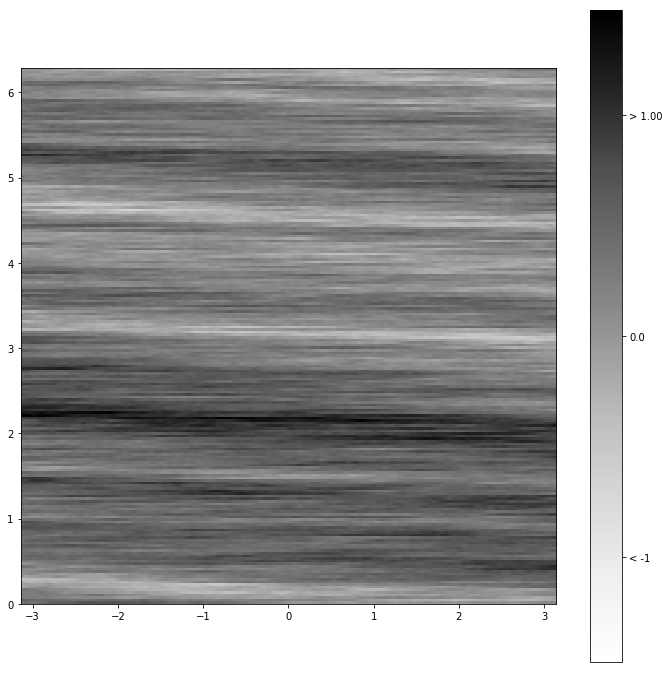

In [19]:

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
picture = ax.imshow(zoom, interpolation='none', cmap = cm.Greys,
                origin='lower', extent=[-np.pi, np.pi, 0, 2*np.pi],
                vmax=abs(zoom).max(), vmin=-abs(zoom).max())
cbar = fig.colorbar(picture, ticks=[ -0.999, 0.0, 0.999  ])
cbar.ax.set_yticklabels(['< -1', '0.0', '> 1.00'])